<a href="https://colab.research.google.com/github/123prashanth123/Fault-Detection-System/blob/Colabs/MiDaS_Depth_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install timm

     |████████████████████████████████| 376 kB 9.0 MB/s 


In [2]:
import cv2
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output

import warnings
warnings.filterwarnings("ignore")

In [3]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
# model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
# model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

clear_output()

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


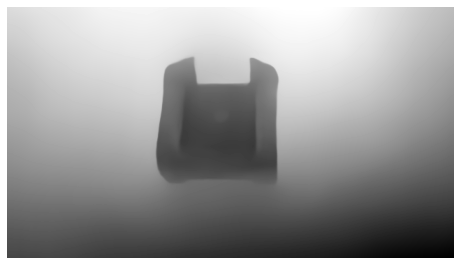

In [5]:
image = cv2.cvtColor(src=cv2.imread("/content/Snapshot_4.png", cv2.IMREAD_COLOR), code=cv2.COLOR_BGR2RGB)
h, w, _ = image.shape

with torch.no_grad():
    prediction = midas(transform(image).to(device)).squeeze()

output = prediction.cpu().numpy()

depth_image = 255 - cv2.resize(src=output, dsize=(w, h), interpolation=cv2.INTER_AREA)

plt.figure(figsize=(8, 6))
plt.imshow(depth_image, cmap="gray")
plt.axis("off")
plt.show()